In [1]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout , Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import cv2,os
#from tensorflow.keras.utils import np_utils

In [2]:
path_train = "/home/viettinh/Machine_learning/Face/archive/train/"
path_test = "/home/viettinh/Machine_learning/Face/archive/test/"

In [3]:
X_train, y_train = [],[]
X_test, y_test =[], []

In [4]:
#load data train, thêm data , làm ảnh không mờ
def load_data(path):
    l=0
    for folder in os.listdir(path):
        path_folder = path + folder
        for name_image in os.listdir( path_folder):
            path_image = path_folder +"/"+ name_image
            image = cv2.imread(path_image,0)
            img_kernel = cv2.medianBlur(image,5)
            X_train.append(img_kernel)
            y_train.append(l)
            quadrant_turn = [15,30,45,90,135,180,270]
            if folder == "disgust":
                for j in quadrant_turn:
                    (h, w) = image.shape
                    center = (w / 2, h / 2)
                    check = cv2.getRotationMatrix2D(center, j , 0)
                    img_turn = cv2.warpAffine(image, check, (h, w))
                    img_kernel = cv2.medianBlur(img_turn,5)
                    X_train.append(img_kernel)
                    y_train.append(l)
        l+=1


In [5]:
load_data(path_train)

In [7]:
X_train = np.array(X_train) 
X_train = X_train/255
print(X_train.shape)
X_train= X_train.reshape(X_train.shape[0],48,48,1)
X_val = X_train
y_train =np.array(y_train)
y_val = np.array(y_train)

(31761, 48, 48)


In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(31761, 48, 48, 1)
(31761,)
(31761, 48, 48, 1)
(31761,)


In [28]:
model = Sequential()
#box1
# dùng hàm rule làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(64,(3,3), activation = 'relu',input_shape=(48,48,1),padding='same', data_format='channels_last'))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
#box2
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same', data_format='channels_last'))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [30]:

#box3
model.add(Conv2D(256,(3,3), activation = 'relu',padding='same', data_format='channels_last'))
model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
#box4
model.add(Conv2D(512,(3,3), activation = 'relu',padding='same', data_format='channels_last'))
model.add(Conv2D(512,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.add(Flatten()) #Flatten layer chuyển từ tensor sang vector
model.add(Dense(128, activation='relu'))# Thêm Fully Connected layer với 128 nodes và dùng hàm rule
model.add(Dense(10, activation='softmax'))# Output layer với 10 node và dùng sigmoid function để chuyển sang xác suất.

In [33]:
# đùng để tối ưu hàm loss function.
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
H = model.fit(X_train, y_train, validation_data= (X_val,y_val) ,batch_size=32, epochs=20, verbose=1)

Epoch 1/20
993/993 [==============================] - 514s 516ms/step - loss: 1.6301 - accuracy: 0.3546 - val_loss: 1.4624 - val_accuracy: 0.4173
Epoch 2/20
993/993 [==============================] - 517s 521ms/step - loss: 1.3912 - accuracy: 0.4606 - val_loss: 1.2970 - val_accuracy: 0.5030
Epoch 3/20
993/993 [==============================] - 518s 522ms/step - loss: 1.2837 - accuracy: 0.5070 - val_loss: 1.2173 - val_accuracy: 0.5358
Epoch 4/20
993/993 [==============================] - 518s 521ms/step - loss: 1.1853 - accuracy: 0.5494 - val_loss: 1.0765 - val_accuracy: 0.5952
Epoch 5/20
993/993 [==============================] - 518s 522ms/step - loss: 1.0694 - accuracy: 0.5937 - val_loss: 0.9130 - val_accuracy: 0.6567
Epoch 6/20
993/993 [==============================] - 550s 554ms/step - loss: 0.9330 - accuracy: 0.6518 - val_loss: 0.7504 - val_accuracy: 0.7360
Epoch 7/20
993/993 [==============================] - 631s 636ms/step - loss: 0.7526 - accuracy: 0.7237 - val_loss: 0.5130 -

In [35]:
path_test = "/home/viettinh/Machine_learning/Face/archive/test/"
#load dât test
X_test, y_test =[],[]
for folder in os.listdir(path_test):
    l=0
    path_folder = path_test + folder
    for name_image in os.listdir( path_folder):
        path_image = path_folder +"/"+ name_image
        image = cv2.imread(path_image,0)
        img_kernel = cv2.medianBlur(image,5)
        X_test.append(img_kernel)
        y_test.append(l)
    l+=1
X_test = np.array(X_test) 
X_test= X_test/255
X_test = X_test.reshape(X_test.shape[0],48,48,1)
y_test = np.array(y_test)

In [36]:
predict=model.fit(X_test,y_test)
#model.save(model.hdf5)

225/225 [==============================] - 104s 461ms/step - loss: 0.1100 - accuracy: 0.9870


In [37]:
print("Evaluate in test data ")
store = model. evaluate(X_test, y_test, verbose=0)
print (store)

Evaluate in test data 
[2.1025771275162697e-06, 1.0]


In [38]:
model.save('model.h5')

Giá trị dự đoán:  0
0


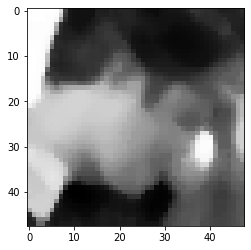

In [49]:
import matplotlib.pyplot as plt 
plt.imshow(X_test[7].reshape(48,48,1), cmap='gray')
y_predict = model.predict(X_test[7].reshape(1,48,48,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))
print(y_test[7])